# Basic Relationships between different baseball statistics

As a function of season.

In [1]:
# standard imports
import numpy as np
import os

# plotting tools
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm

# data management
import pandas as pd

#
from scipy import stats
import scipy

In [2]:
import hittingpredictor as hp

In [3]:
df = hp.scrape_year(year=2019,cat='bat',verbose=0)

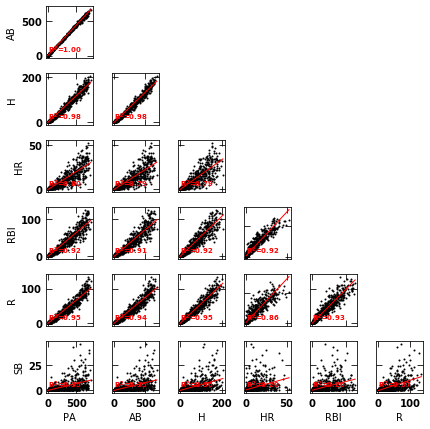

In [7]:
categories = ['PA','AB','H','HR','RBI','R','SB']


ncategories = len(categories)

catrange = np.arange(1,(ncategories)*(ncategories)+1)



fig = plt.figure(figsize=(7,7))

for x in catrange:
    i = (x-1)%(ncategories) # this is the column
    j = int((x-1)/(ncategories)) # this is the row
    #print(i,j,x)
    
    pltnum = ((j)*(ncategories-1)) + (i) + 1
    


    
    if i>=j: continue
        
    #print(pltnum,i,j)


    
    ax = fig.add_subplot((ncategories),(ncategories),x)
            
    ax.scatter(df[categories[i]],df[categories[j]],color='black',s=1.)

    
    cleanx = np.array(df[categories[i]]).astype('float')
    cleany = np.array(df[categories[j]]).astype('float')
    w = np.where(np.isfinite(cleanx) & np.isfinite(cleany))

    # do the stats
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(cleanx[w],cleany[w])
    
    xvals = np.linspace(np.nanmin(cleanx[w]),np.nanmax(cleanx[w]),100)
    ax.plot(xvals,xvals*slope + intercept,color='red',lw=1.0)
    
    ax.text(np.nanmin(cleanx[w]),np.nanmin(cleany[w]),'R$^2$={0:3.2f}'.format(r_value**2),color='red',ha='left',va='bottom',size=7)
    
    if j==ncategories-1: 
        ax.set_xlabel(categories[i])
    else:
        ax.set_xticklabels(())
        
    if i==0: 
        ax.set_ylabel(categories[j])
    else:
        ax.set_yticklabels(())
        
    ax.yaxis.set_ticks_position('both')
    ax.xaxis.set_ticks_position('both')
    ax.tick_params(axis="y",which='both',direction="in")
    ax.tick_params(axis="x",which='both',direction="in",pad=5)
        
fig.tight_layout()

plt.savefig('figures/battingcorrelations_nocolor.png')



In [8]:

# which years are we interested in querying?
years = range(2019, 2019+1)


year_dfs = []

for year in years:

    df = hp.scrape_year(year=year,cat='bat',verbose=0)
    year_dfs.append(df)

# concatenate results from all years
all_year_data = year_dfs[0]
for year in year_dfs[1:]:
    all_year_data = pd.concat([all_year_data, year])
    




nclusters = 12

year_df,df,stereotype_df,hitter_cluster_centroid_df,transform = hp.compute_cluster(all_year_data,years,nclusters,min_pas=150,verbose=0)



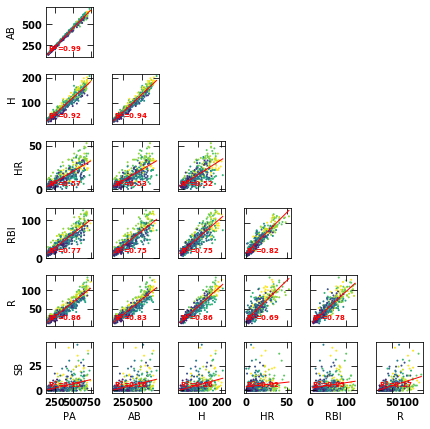

In [9]:
categories = ['PA','AB','H','HR','RBI','R','SB']


ncategories = len(categories)

catrange = np.arange(1,(ncategories)*(ncategories)+1)



fig = plt.figure(figsize=(7,7))

for x in catrange:
    i = (x-1)%(ncategories) # this is the column
    j = int((x-1)/(ncategories)) # this is the row
    #print(i,j,x)
    
    pltnum = ((j)*(ncategories-1)) + (i) + 1
    


    
    if i>=j: continue
        
    #print(pltnum,i,j)


    
    ax = fig.add_subplot((ncategories),(ncategories),x)
            

    
    cleanx = np.array(df[categories[i]]).astype('float')
    cleany = np.array(df[categories[j]]).astype('float')
    cleanz = np.array(df['Value Cluster']).astype('float')
    w = np.where(np.isfinite(cleanx) & np.isfinite(cleany))
    
    ax.scatter(cleanx,cleany,color=cm.viridis(cleanz/12.,1.),s=1.)


    # do the stats
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(cleanx[w],cleany[w])
    
    xvals = np.linspace(np.nanmin(cleanx[w]),np.nanmax(cleanx[w]),100)
    ax.plot(xvals,xvals*slope + intercept,color='red',lw=1.0)
    
    ax.text(np.nanmin(cleanx[w]),np.nanmin(cleany[w]),'R$^2$={0:3.2f}'.format(r_value**2),color='red',ha='left',va='bottom',size=7)
    
    if j==ncategories-1: 
        ax.set_xlabel(categories[i])
    else:
        ax.set_xticklabels(())
        
    if i==0: 
        ax.set_ylabel(categories[j])
    else:
        ax.set_yticklabels(())
        
    ax.yaxis.set_ticks_position('both')
    ax.xaxis.set_ticks_position('both')
    ax.tick_params(axis="y",which='both',direction="in")
    ax.tick_params(axis="x",which='both',direction="in",pad=5)
        
        
fig.tight_layout()

plt.savefig('figures/battingcorrelations.png')



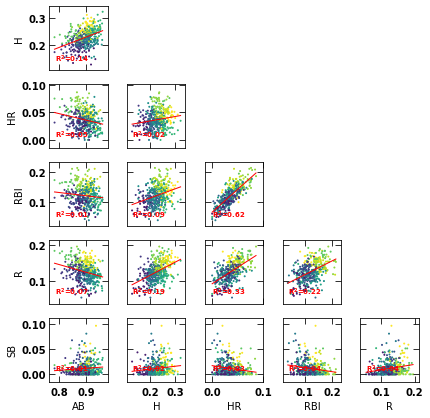

In [10]:
# do the same set of correlations normalized by PAs

categories = ['AB','H','HR','RBI','R','SB']


ncategories = len(categories)

catrange = np.arange(1,(ncategories)*(ncategories)+1)



fig = plt.figure(figsize=(7,7))

for x in catrange:
    i = (x-1)%(ncategories) # this is the column
    j = int((x-1)/(ncategories)) # this is the row
    #print(i,j,x)
    
    pltnum = ((j)*(ncategories-1)) + (i) + 1
    


    
    if i>=j: continue
        
    #print(pltnum,i,j)


    
    ax = fig.add_subplot((ncategories),(ncategories),x)
            

    
    cleanx = np.array(df[categories[i]]).astype('float')
    cleany = np.array(df[categories[j]]).astype('float')
    cleanz = np.array(df['Value Cluster']).astype('float')
    cleann = np.array(df['PA']).astype('float')
    w = np.where(np.isfinite(cleanx) & np.isfinite(cleany))
    
    ax.scatter(cleanx/cleann,cleany/cleann,color=cm.viridis(cleanz/12.,1.),s=1.)


    # do the stats
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress((cleanx/cleann)[w],(cleany/cleann)[w])
    
    xvals = np.linspace(np.nanmin((cleanx/cleann)[w]),np.nanmax((cleanx/cleann)[w]),100)
    ax.plot(xvals,xvals*slope + intercept,color='red',lw=1.0)
    
    ax.text(np.nanmin((cleanx/cleann)[w]),np.nanmin((cleany/cleann)[w]),'R$^2$={0:3.2f}'.format(r_value**2),color='red',ha='left',va='bottom',size=7)
    
    if j==ncategories-1: 
        ax.set_xlabel(categories[i])
    else:
        ax.set_xticklabels(())
        
    if i==0: 
        ax.set_ylabel(categories[j])
    else:
        ax.set_yticklabels(())
        
    ax.yaxis.set_ticks_position('both')
    ax.xaxis.set_ticks_position('both')
    ax.tick_params(axis="y",which='both',direction="in")
    ax.tick_params(axis="x",which='both',direction="in",pad=5)
        
        
fig.tight_layout()

plt.savefig('figures/battingcorrelations_normalized.png')

7    88.567392
Name: AB.Centroid, dtype: float64 7    15.001996
Name: H.Centroid, dtype: float64
7    88.567392
Name: AB.Centroid, dtype: float64 7    2.164995
Name: HR.Centroid, dtype: float64
7    15.001996
Name: H.Centroid, dtype: float64 7    2.164995
Name: HR.Centroid, dtype: float64
7    88.567392
Name: AB.Centroid, dtype: float64 7    8.050225
Name: RBI.Centroid, dtype: float64
7    15.001996
Name: H.Centroid, dtype: float64 7    8.050225
Name: RBI.Centroid, dtype: float64
7    2.164995
Name: HR.Centroid, dtype: float64 7    8.050225
Name: RBI.Centroid, dtype: float64
7    88.567392
Name: AB.Centroid, dtype: float64 7    8.768347
Name: R.Centroid, dtype: float64
7    15.001996
Name: H.Centroid, dtype: float64 7    8.768347
Name: R.Centroid, dtype: float64
7    2.164995
Name: HR.Centroid, dtype: float64 7    8.768347
Name: R.Centroid, dtype: float64
7    8.050225
Name: RBI.Centroid, dtype: float64 7    8.768347
Name: R.Centroid, dtype: float64
7    88.567392
Name: AB.Centroid, dt

0    92.555205
Name: AB.Centroid, dtype: float64 0    21.31622
Name: H.Centroid, dtype: float64
0    92.555205
Name: AB.Centroid, dtype: float64 0    3.14465
Name: HR.Centroid, dtype: float64
0    21.31622
Name: H.Centroid, dtype: float64 0    3.14465
Name: HR.Centroid, dtype: float64
0    92.555205
Name: AB.Centroid, dtype: float64 0    12.705227
Name: RBI.Centroid, dtype: float64
0    21.31622
Name: H.Centroid, dtype: float64 0    12.705227
Name: RBI.Centroid, dtype: float64
0    3.14465
Name: HR.Centroid, dtype: float64 0    12.705227
Name: RBI.Centroid, dtype: float64
0    92.555205
Name: AB.Centroid, dtype: float64 0    10.896134
Name: R.Centroid, dtype: float64
0    21.31622
Name: H.Centroid, dtype: float64 0    10.896134
Name: R.Centroid, dtype: float64
0    3.14465
Name: HR.Centroid, dtype: float64 0    10.896134
Name: R.Centroid, dtype: float64
0    12.705227
Name: RBI.Centroid, dtype: float64 0    10.896134
Name: R.Centroid, dtype: float64
0    92.555205
Name: AB.Centroid, dt

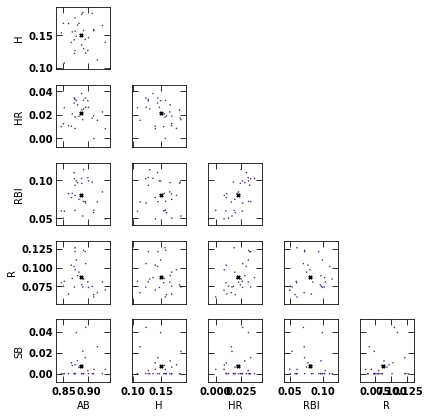

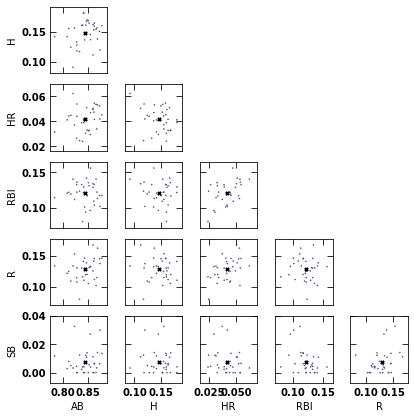

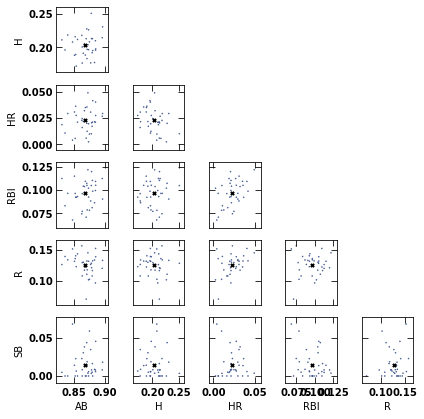

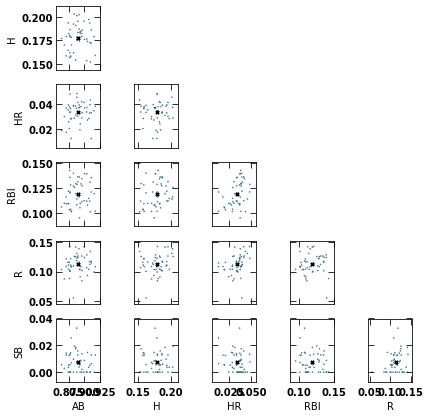

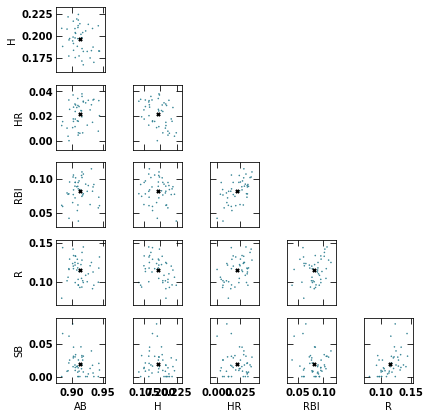

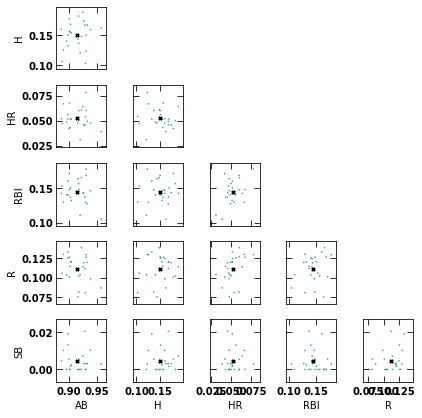

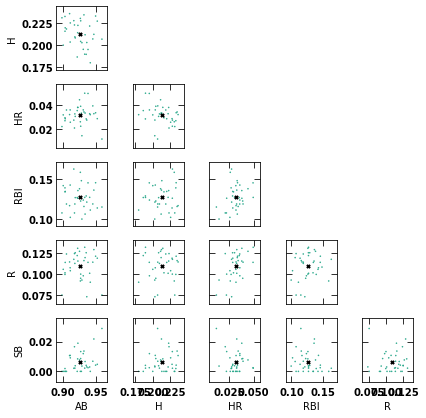

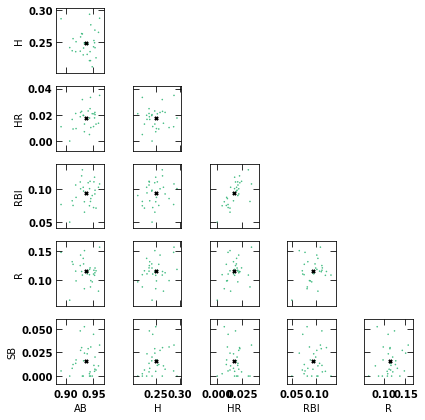

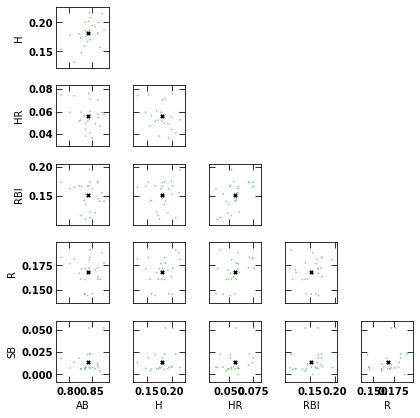

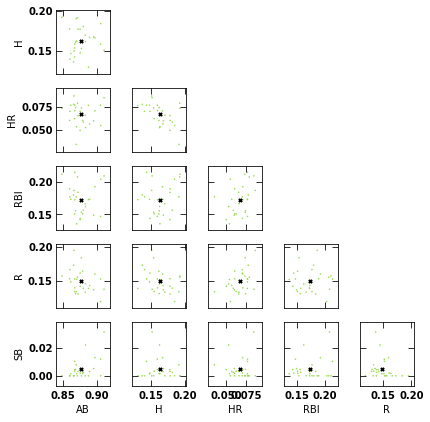

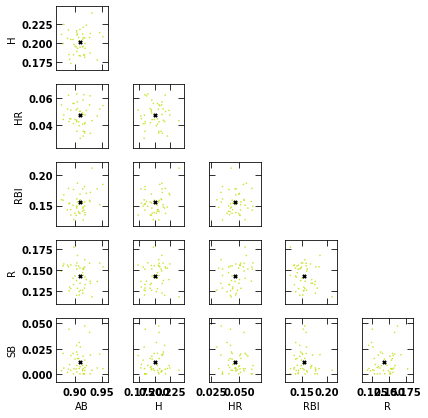

In [11]:
# do the same set of correlations normalized by PAs

categories = ['AB','H','HR','RBI','R','SB']


ncategories = len(categories)

catrange = np.arange(1,(ncategories)*(ncategories)+1)


for clusternum in range(1,12): 
    
    fig = plt.figure(figsize=(7,7))

    for x in catrange:
        i = (x-1)%(ncategories) # this is the column
        j = int((x-1)/(ncategories)) # this is the row
        #print(i,j,x)

        pltnum = ((j)*(ncategories-1)) + (i) + 1




        if i>=j: continue

        #print(pltnum,i,j)



        ax = fig.add_subplot((ncategories),(ncategories),x)

        if categories[i] == 'H':
            cleanx = np.array(df[categories[i]]).astype('float') - np.array(df['HR']).astype('float')
        else:
            cleanx = np.array(df[categories[i]]).astype('float')

        if categories[j] == 'H':
            cleany = np.array(df[categories[j]]).astype('float') - np.array(df['HR']).astype('float')
        else:
            cleany = np.array(df[categories[j]]).astype('float')

        cleanz = np.array(df['Value Cluster']).astype('float')
        cleann = np.array(df['PA']).astype('float')
        w = np.where(np.isfinite(cleanx/cleann) & np.isfinite(cleany/cleann) & (cleanz==clusternum))

        ax.scatter((cleanx/cleann)[w],(cleany/cleann)[w],color=cm.viridis(cleanz[w]/12.,1.),s=0.3)

        try:
            xval = np.abs(hitter_cluster_centroid_df[categories[i]+'.Centroid'][hitter_cluster_centroid_df['Value Cluster']==clusternum].astype('float'))
            yval = np.abs(hitter_cluster_centroid_df[categories[j]+'.Centroid'][hitter_cluster_centroid_df['Value Cluster']==clusternum].astype('float'))
            print(xval,yval)
            ax.scatter(xval/100.,yval/100.,color='black',marker='x',s=10.)
        except:
            print(categories[i],categories[j])
            
            
        if j==ncategories-1: 
            ax.set_xlabel(categories[i])
        else:
            ax.set_xticklabels(())

        if i==0: 
            ax.set_ylabel(categories[j])
        else:
            ax.set_yticklabels(())

        ax.yaxis.set_ticks_position('both')
        ax.xaxis.set_ticks_position('both')
        ax.tick_params(axis="y",which='both',direction="in")
        ax.tick_params(axis="x",which='both',direction="in",pad=5)


    fig.tight_layout()

    plt.savefig('figures/battingcorrelations_normalized{}.png'.format(clusternum))
    


## Part 2: Pitching Correlations

In [12]:
import pitchingpredictor as pp

In [13]:
df = pp.scrape_year(year=2019,cat='pit',verbose=0)

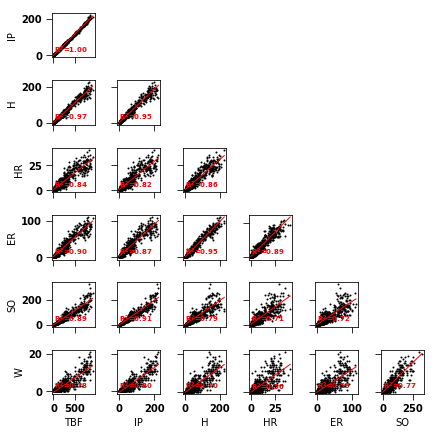

In [14]:
categories = ['TBF','IP','H','HR','ER','SO','W']


ncategories = len(categories)

catrange = np.arange(1,(ncategories)*(ncategories)+1)



fig = plt.figure(figsize=(7,7))

for x in catrange:
    i = (x-1)%(ncategories) # this is the column
    j = int((x-1)/(ncategories)) # this is the row
    #print(i,j,x)
    
    pltnum = ((j)*(ncategories-1)) + (i) + 1
    


    
    if i>=j: continue
        
    #print(pltnum,i,j)


    
    ax = fig.add_subplot((ncategories),(ncategories),x)
            
    ax.scatter(df[categories[i]],df[categories[j]],color='black',s=1.)

    
    cleanx = np.array(df[categories[i]]).astype('float')
    cleany = np.array(df[categories[j]]).astype('float')
    w = np.where(np.isfinite(cleanx) & np.isfinite(cleany))

    # do the stats
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(cleanx[w],cleany[w])
    
    xvals = np.linspace(np.nanmin(cleanx[w]),np.nanmax(cleanx[w]),100)
    ax.plot(xvals,xvals*slope + intercept,color='red',lw=1.0)
    
    ax.text(np.nanmin(cleanx[w]),np.nanmin(cleany[w]),'R$^2$={0:3.2f}'.format(r_value**2),color='red',ha='left',va='bottom',size=7)
    
    if j==ncategories-1: 
        ax.set_xlabel(categories[i])
    else:
        ax.set_xticklabels(())
        
    if i==0: 
        ax.set_ylabel(categories[j])
    else:
        ax.set_yticklabels(())
        
        
fig.tight_layout()

plt.savefig('figures/pitchingcorrelations_nocolor.png')




In [15]:

# which years are we interested in querying?
years = range(2019, 2019+1)


year_dfs = []

for year in years:

    df = pp.scrape_year(year=year,cat='pit',verbose=0)
    year_dfs.append(df)

# concatenate results from all years
all_year_data = year_dfs[0]
for year in year_dfs[1:]:
    all_year_data = pd.concat([all_year_data, year])
    




nclusters = 12

year_df,df,stereotype_df,pitching_cluster_centroid_df,transform = pp.compute_cluster_pitching(all_year_data,years,nclusters,min_ip=10,verbose=0)




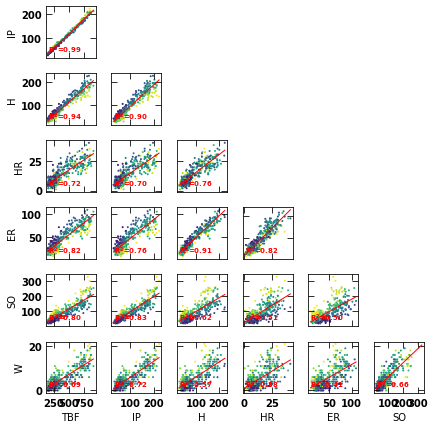

In [16]:
categories = ['TBF','IP','H','HR','ER','SO','W']



ncategories = len(categories)

catrange = np.arange(1,(ncategories)*(ncategories)+1)



fig = plt.figure(figsize=(7,7))

for x in catrange:
    i = (x-1)%(ncategories) # this is the column
    j = int((x-1)/(ncategories)) # this is the row
    #print(i,j,x)
    
    pltnum = ((j)*(ncategories-1)) + (i) + 1
    


    
    if i>=j: continue
        
    #print(pltnum,i,j)


    
    ax = fig.add_subplot((ncategories),(ncategories),x)
            

    
    cleanx = np.array(df[categories[i]]).astype('float')
    cleany = np.array(df[categories[j]]).astype('float')
    cleanz = np.array(df['Value Cluster']).astype('float')
    w = np.where(np.isfinite(cleanx) & np.isfinite(cleany))
    
    ax.scatter(cleanx,cleany,color=cm.viridis(cleanz/12.,1.),s=1.)


    # do the stats
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(cleanx[w],cleany[w])
    
    xvals = np.linspace(np.nanmin(cleanx[w]),np.nanmax(cleanx[w]),100)
    ax.plot(xvals,xvals*slope + intercept,color='red',lw=1.0)
    
    ax.text(np.nanmin(cleanx[w]),np.nanmin(cleany[w]),'R$^2$={0:3.2f}'.format(r_value**2),color='red',ha='left',va='bottom',size=7)
    
    if j==ncategories-1: 
        ax.set_xlabel(categories[i])
    else:
        ax.set_xticklabels(())
        
    if i==0: 
        ax.set_ylabel(categories[j])
    else:
        ax.set_yticklabels(())
        
    ax.yaxis.set_ticks_position('both')
    ax.xaxis.set_ticks_position('both')
    ax.tick_params(axis="y",which='both',direction="in")
    ax.tick_params(axis="x",which='both',direction="in",pad=5)
        
        
fig.tight_layout()

plt.savefig('figures/pitchingcorrelations.png')



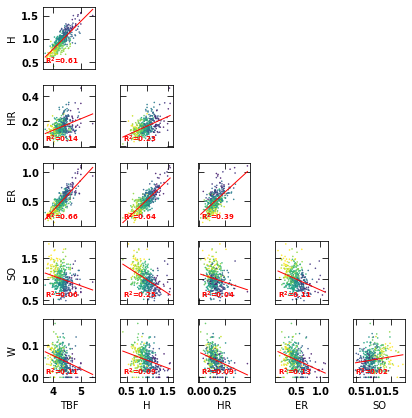

In [17]:
categories = ['TBF','H','HR','ER','SO','W']



ncategories = len(categories)

catrange = np.arange(1,(ncategories)*(ncategories)+1)



fig = plt.figure(figsize=(7,7))

for x in catrange:
    i = (x-1)%(ncategories) # this is the column
    j = int((x-1)/(ncategories)) # this is the row
    #print(i,j,x)
    
    pltnum = ((j)*(ncategories-1)) + (i) + 1
    


    
    if i>=j: continue
        
    #print(pltnum,i,j)


    
    ax = fig.add_subplot((ncategories),(ncategories),x)
            

    
    cleanx = np.array(df[categories[i]]).astype('float')
    cleany = np.array(df[categories[j]]).astype('float')
    cleanz = np.array(df['Value Cluster']).astype('float')
    cleann = np.array(df['IP']).astype('float')
    w = np.where(np.isfinite(cleanx/cleann) & np.isfinite(cleany/cleann))
    
    ax.scatter(cleanx/cleann,cleany/cleann,color=cm.viridis(cleanz/12.,1.),s=0.3)


    # do the stats
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress((cleanx/cleann)[w],(cleany/cleann)[w])
    
    xvals = np.linspace(np.nanmin((cleanx/cleann)[w]),np.nanmax((cleanx/cleann)[w]),100)
    ax.plot(xvals,xvals*slope + intercept,color='red',lw=1.0)
    
    ax.text(np.nanmin((cleanx/cleann)[w]),np.nanmin((cleany/cleann)[w]),'R$^2$={0:3.2f}'.format(r_value**2),color='red',ha='left',va='bottom',size=7)
    
    if j==ncategories-1: 
        ax.set_xlabel(categories[i])
    else:
        ax.set_xticklabels(())
        
    if i==0: 
        ax.set_ylabel(categories[j])
    else:
        ax.set_yticklabels(())
        
    ax.yaxis.set_ticks_position('both')
    ax.xaxis.set_ticks_position('both')
    ax.tick_params(axis="y",which='both',direction="in")
    ax.tick_params(axis="x",which='both',direction="in",pad=5)
        
        
fig.tight_layout()

plt.savefig('figures/pitchingcorrelations_normalized.png')

TBF H
TBF BB
10    110.535799
Name: H.Centroid, dtype: float64 10    49.617863
Name: BB.Centroid, dtype: float64
TBF HR
10    110.535799
Name: H.Centroid, dtype: float64 10    18.97224
Name: HR.Centroid, dtype: float64
10    49.617863
Name: BB.Centroid, dtype: float64 10    18.97224
Name: HR.Centroid, dtype: float64
TBF ER
10    110.535799
Name: H.Centroid, dtype: float64 10    76.281348
Name: ER.Centroid, dtype: float64
10    49.617863
Name: BB.Centroid, dtype: float64 10    76.281348
Name: ER.Centroid, dtype: float64
10    18.97224
Name: HR.Centroid, dtype: float64 10    76.281348
Name: ER.Centroid, dtype: float64
TBF SO
10    110.535799
Name: H.Centroid, dtype: float64 10    86.60052
Name: SO.Centroid, dtype: float64
10    49.617863
Name: BB.Centroid, dtype: float64 10    86.60052
Name: SO.Centroid, dtype: float64
10    18.97224
Name: HR.Centroid, dtype: float64 10    86.60052
Name: SO.Centroid, dtype: float64
10    76.281348
Name: ER.Centroid, dtype: float64 10    86.60052
Name: SO

5    48.576635
Name: ER.Centroid, dtype: float64 5    121.460481
Name: SO.Centroid, dtype: float64
TBF W
H W
BB W
HR W
ER W
SO W
TBF H
TBF BB
4    68.84792
Name: H.Centroid, dtype: float64 4    40.299391
Name: BB.Centroid, dtype: float64
TBF HR
4    68.84792
Name: H.Centroid, dtype: float64 4    13.175422
Name: HR.Centroid, dtype: float64
4    40.299391
Name: BB.Centroid, dtype: float64 4    13.175422
Name: HR.Centroid, dtype: float64
TBF ER
4    68.84792
Name: H.Centroid, dtype: float64 4    41.028091
Name: ER.Centroid, dtype: float64
4    40.299391
Name: BB.Centroid, dtype: float64 4    41.028091
Name: ER.Centroid, dtype: float64
4    13.175422
Name: HR.Centroid, dtype: float64 4    41.028091
Name: ER.Centroid, dtype: float64
TBF SO
4    68.84792
Name: H.Centroid, dtype: float64 4    99.025073
Name: SO.Centroid, dtype: float64
4    40.299391
Name: BB.Centroid, dtype: float64 4    99.025073
Name: SO.Centroid, dtype: float64
4    13.175422
Name: HR.Centroid, dtype: float64 4    99.0250

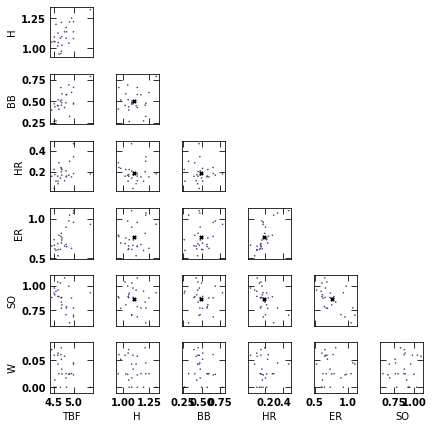

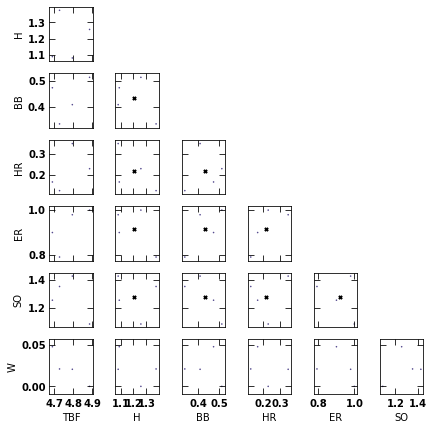

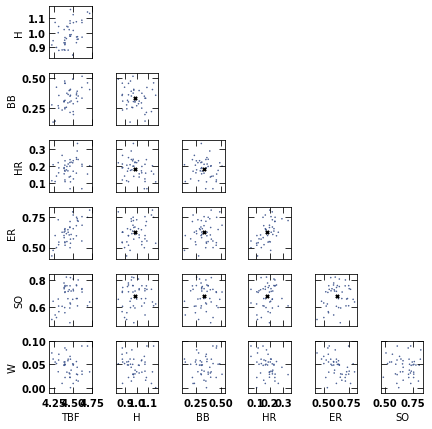

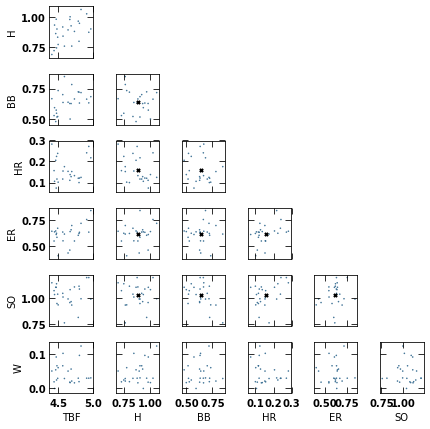

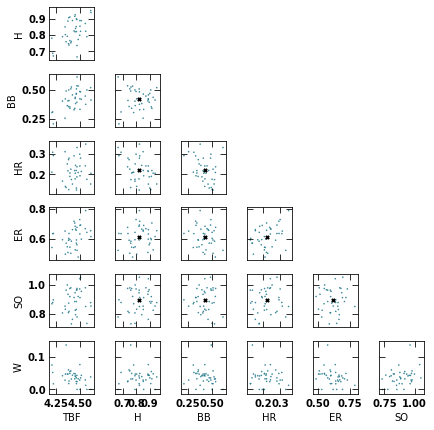

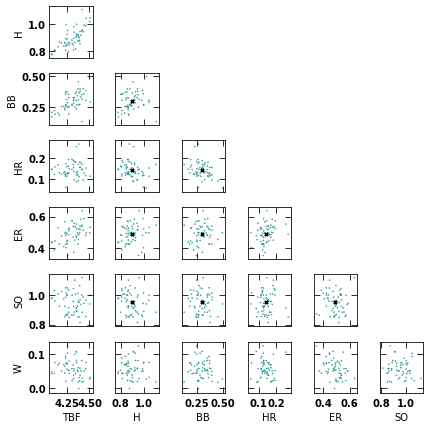

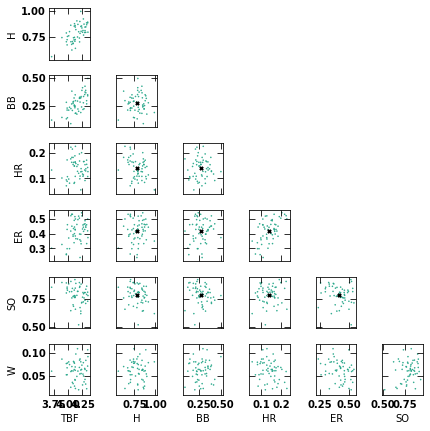

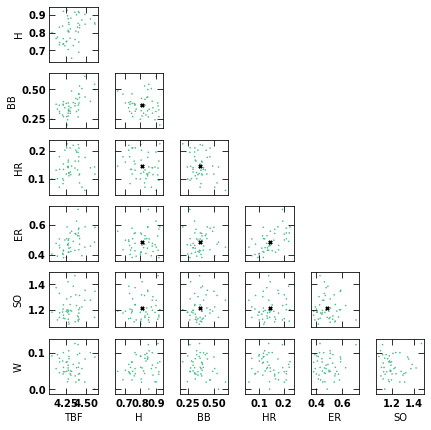

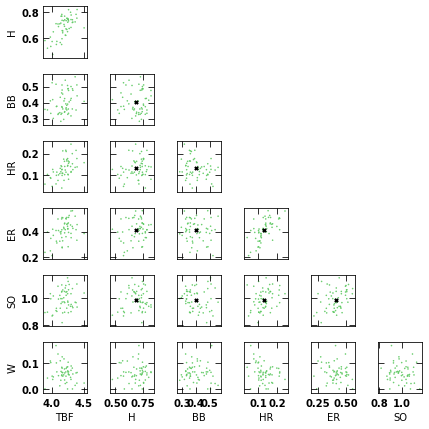

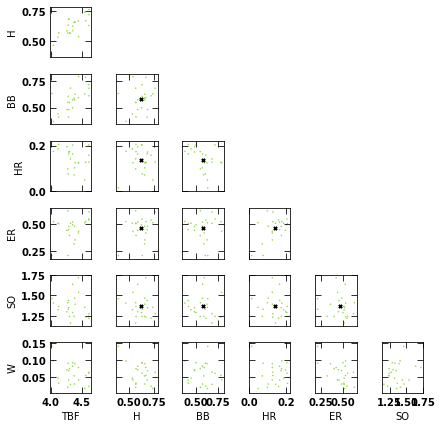

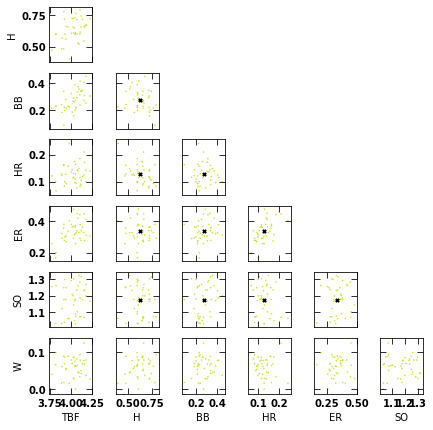

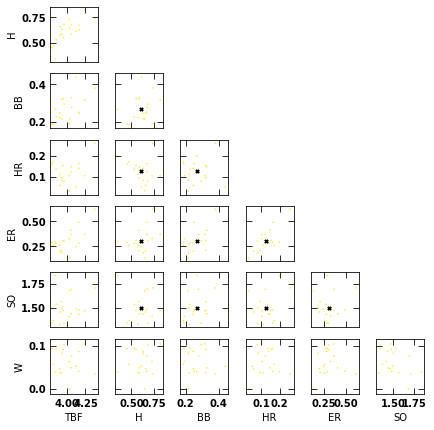

In [18]:
categories = ['TBF','H','BB','HR','ER','SO','W']



ncategories = len(categories)

catrange = np.arange(1,(ncategories)*(ncategories)+1)

for clusternum in range(1,13):

    fig = plt.figure(figsize=(7,7))

    for x in catrange:
        i = (x-1)%(ncategories) # this is the column
        j = int((x-1)/(ncategories)) # this is the row
        #print(i,j,x)

        pltnum = ((j)*(ncategories-1)) + (i) + 1




        if i>=j: continue

        #print(pltnum,i,j)



        ax = fig.add_subplot((ncategories),(ncategories),x)

        if categories[i] == 'H':
            cleanx = np.array(df[categories[i]]).astype('float') - np.array(df['HR']).astype('float')
        else:
            cleanx = np.array(df[categories[i]]).astype('float')

        if categories[j] == 'H':
            cleany = np.array(df[categories[j]]).astype('float') - np.array(df['HR']).astype('float')
        else:
            cleany = np.array(df[categories[j]]).astype('float')

        cleanz = np.array(df['Value Cluster']).astype('float')
        cleann = np.ones(cleanx.size)#np.array(df['IP']).astype('float')
        cleann = np.array(df['IP']).astype('float')
        w = np.where(np.isfinite(cleanx/cleann) & np.isfinite(cleany/cleann) & (cleanz==clusternum))

        ax.scatter((cleanx/cleann)[w],(cleany/cleann)[w],color=cm.viridis(cleanz[w]/12.,1.),s=0.3)

        try:
            xval = np.abs(pitching_cluster_centroid_df[categories[i]+'.Centroid'][pitching_cluster_centroid_df['Value Cluster']==clusternum].astype('float'))
            yval = np.abs(pitching_cluster_centroid_df[categories[j]+'.Centroid'][pitching_cluster_centroid_df['Value Cluster']==clusternum].astype('float'))
            print(xval,yval)
            ax.scatter(xval/100.,yval/100.,color='black',marker='x',s=10.)
        except:
            print(categories[i],categories[j])

        if j==ncategories-1: 
            ax.set_xlabel(categories[i])
        else:
            ax.set_xticklabels(())

        if i==0: 
            ax.set_ylabel(categories[j])
        else:
            ax.set_yticklabels(())

        ax.yaxis.set_ticks_position('both')
        ax.xaxis.set_ticks_position('both')
        ax.tick_params(axis="y",which='both',direction="in")
        ax.tick_params(axis="x",which='both',direction="in",pad=5)


    fig.tight_layout()

    plt.savefig('figures/pitchingcorrelations_cluster{}.png'.format(clusternum))